1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method
    
    

number of bins: 7


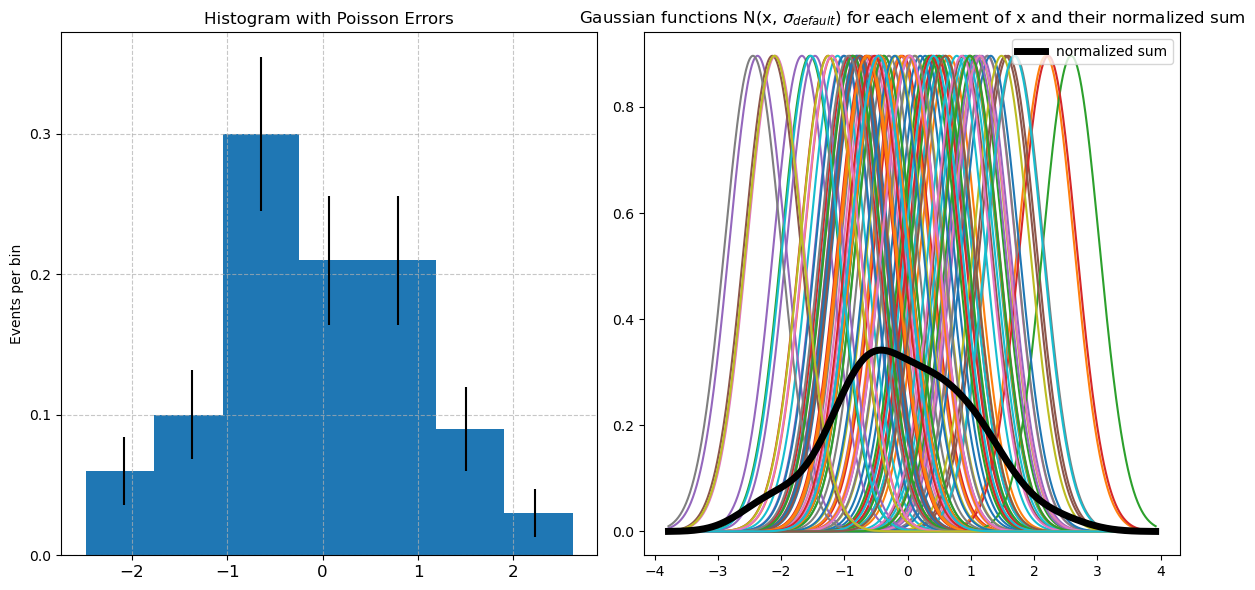

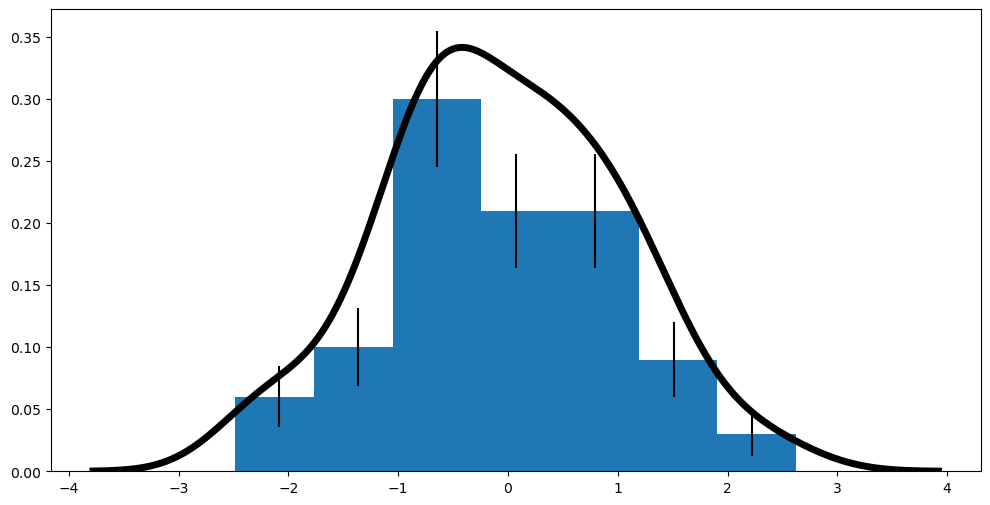

In [3]:
import numpy as np
import numpy.random as rnd
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

# First I create the canvas
fig, (axs1,axs2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 6)) 
#print(np.shape(axs))

# Fill a numpy array x of len(N) with N = O(100) with a variable normally distributed, with a given mean and standard deviation
N = 100  # Length of the array
mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
x = rnd.normal(loc=mean, scale=std_dev, size=N)

"""#Fill an histogram in pyplot --> this would show only the points and the errorbars, but not the histogram 
num_bins = int(np.sqrt(len(x)))  # Sturges' formula for binning 
counts, bin_edges = np.histogram(x, bins=num_bins) #see documentation np.histogram, those two are the returned values: counts for each bin and bin edges
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:]) # Compute bin centers and Poisson uncertainties (sqrt(counts))
norm_counts = counts/len(x)
errors = 1/np.sqrt(counts) 
axs1.errorbar(bin_centers, norm_counts, yerr=errors, fmt='o', capsize=5, label='Data') # Plot the histogram as data points with error bars
"""
#Fill an histogram in pyplot --> this is right, using plt.bar
num_bins = 7
#n = len(x)
#num_bins = int(np.ceil(np.log2(n) + 1)) #Sturges's rule for binning
print("number of bins:",num_bins)
counts, bin_edges = np.histogram(x, bins=num_bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
norm_counts = counts/len(x)
errors = np.sqrt(counts) 
norm_errors = errors/len(x)
axs1.bar(bin_centers, norm_counts, width=0.8, bottom=None, align='center', yerr = norm_errors)

# Aesthetic improvements
axs1.set_xlabel('')  # x-axis label
axs1.set_ylabel('Events per bin')  # y-axis label
axs1.set_title('Histogram with Poisson Errors')  # Plot title
axs1.tick_params(axis='x', labelsize=12)  
#plt.yticks(ticks=np.arange(0, max(counts) + 1, 1), fontsize=12)  # Integer y-tick labels --> this shows all integers, not optimal
#plt.gca().yaxis.set_major_locator(MaxNLocator(4)) #if I had one plot and not two subplots
axs1.yaxis.set_major_locator(MaxNLocator(4)) #Place evenly spaced ticks, with a cap on the total number of ticks.
axs1.grid(True, linestyle='--', alpha=0.7)  # Grid for better visualization

# For every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
#1.06∗𝑥.𝑠𝑡𝑑()∗𝑥.𝑠𝑖𝑧𝑒−15. You can use the scipy function stats.norm() for that.
tunable_std_factor = 1.06  # Factor for the default standard deviation
default_std = tunable_std_factor * x.std() * x.size ** (-1 / 5)
gaussians = []
x_range = np.linspace(min(x) - 3 * default_std, max(x) + 3 * default_std, 1000)
for value in x:
    gaussian = norm.pdf(x_range, loc=value, scale=default_std)
    gaussians.append(gaussian)

# In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
for i in range(len(gaussians)):
    axs2.plot(x_range,gaussians[i])
    axs2.set_title('Gaussian functions N(x, $\sigma_{default}$) for each element of x and their normalized sum')  # Plot title

# Sum (with np.sum()) all the gaussian functions 
summed_gaussians = np.sum(gaussians, axis=0) #print(np.shape(gaussians)) it's (100,1000) you have to sum 100 values (you sum rows values)
#axs2.plot(x_range,summed_gaussians) #like this is fine but not normalized

# Normalize the result such that the integral matches the integral of the original histogram
#--> I must divide by the total area of the summed_gaussian (I want the total area to be one)
area = trapz(summed_gaussians,x_range)
norm_sum_gauss = summed_gaussians/area
axs2.plot(x_range,norm_sum_gauss, linewidth = 5.0, color = 'black', label = 'normalized sum')
axs2.legend(loc = 'upper right')
# Show plot
plt.tight_layout()
plt.show()

#Let's plot everything together
fig = plt.figure(figsize = (12,6))
plt.gca().bar(bin_centers, norm_counts, width=0.8, bottom=None, align='center', yerr = norm_errors)
plt.plot(x_range,norm_sum_gauss, linewidth = 5.0, color = 'black', label = 'normalized sum')
plt.show()


NOTICE: In the previous exercise, the number of bins is fundamental. If you use for example Sturges' rule which would give you 8 bins, wouldn't fit as well. Same if you pick for example 10 bins. 

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

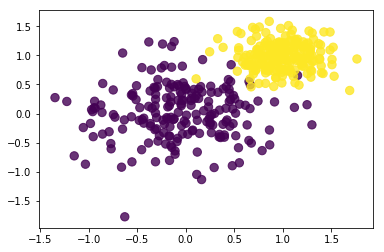

In [4]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#! curl -o two_categories_scatter_plot.png "https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png"

from IPython.display import Image
Image(filename='two_categories_scatter_plot.png')

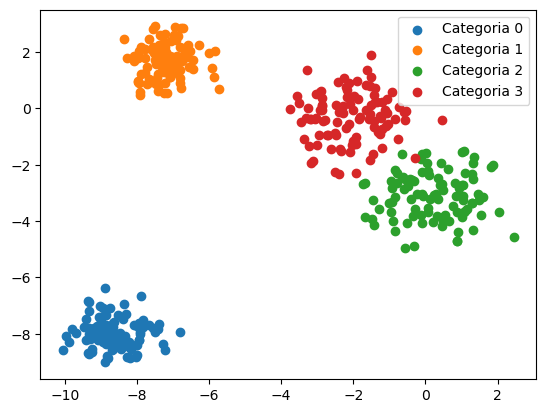

In [5]:
# Write a function that generate a 2D datasets of 2 categories.
#Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means...)
#You can try to make the procedure more general by allowing a given number  𝑛≥2 of categories

def gauss_categories(num_cat,sizes): 
    categories = []
    for i in range(num_cat): 
        cov = np.eye(2)*rnd.uniform() + np.flip(np.eye(2)*rnd.uniform())
        cat = rnd.multivariate_normal(rnd.uniform(-10,10,size = 2), 0.5*cov, size = int(sizes[i]))
        categories.append(cat)
    return categories
    
num_cat = 4
sizes = np.ones(num_cat)*100 #I want 10 points for each class here for example
#print(sizes)
categories = np.array(gauss_categories(num_cat,sizes))
#print(np.shape(categories))
#print(categories[0])
#print(categories[1])
for i in range(num_cat):
    plt.scatter(categories[i,:,0],categories[i,:,1],label=f'Categoria {i}' )

#Oppure per avere altri colori
#colormap = plt.cm.get_cmap('Pastel1', num_cat)
#for i in range(num_cat):
#    plt.scatter(categories[i, :, 0], categories[i, :, 1], color=colormap(i / num_cat), label=f'Categoria {i}')

# Aggiungi una legenda per distinguere le categorie
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

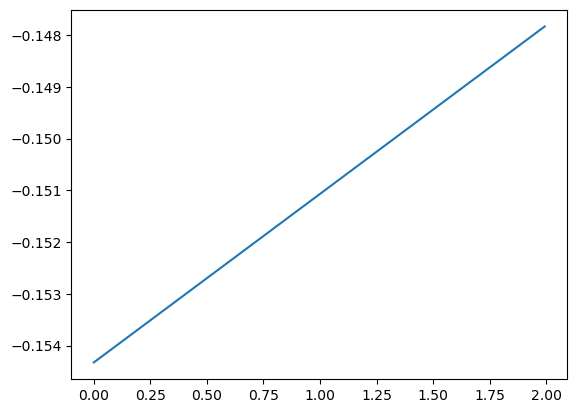

TypeError: regplot() got an unexpected keyword argument 'alpha'

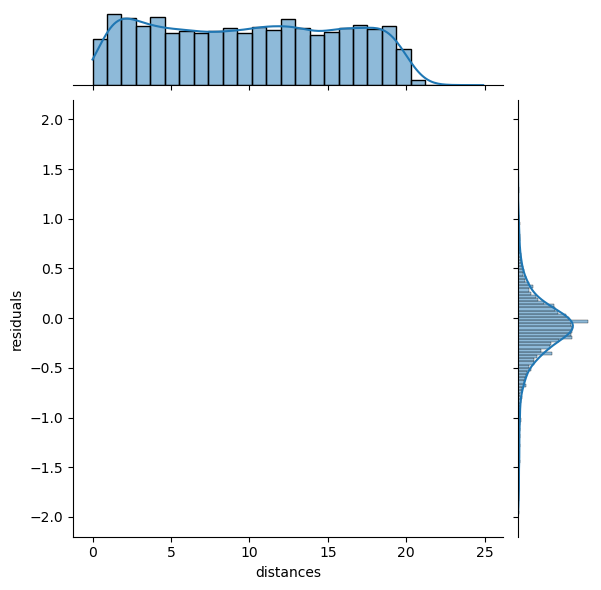

In [14]:
import pandas as pd
from scipy.stats import linregress as lin
import seaborn as sns

#Download the following dataset and load it as a pandas dataframe
residuals = np.load('residuals_261.npy',allow_pickle=True)
res_df = pd.DataFrame(residuals.item())

#Inspect the dataset, you'll find two variables (features)
res_df.head()

#Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
clean_res = res_df.loc[abs(res_df["residuals"])<2]
clean_res

#Perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
regression = lin(clean_res["distances"],clean_res["residuals"])
x = np.linspace(min(clean_res["distances"]),max(clean_res["residuals"]),1000)
y = regression.slope*x + regression.intercept 
plt.plot(x,y)
plt.show()
#Plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. 
#The result of the regression should be displayed on the plot
seabplot = sns.jointplot(data=clean_res, x="distances", y="residuals", kind="reg")
plt.show()

#Fill 3 numpy arrays
#x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
bins = np.linspace(0, 20, 21)  # 20 bins create 20 intervals, each 1 unit wide
x_bins = (bins[:-1] + bins[1:]) / 2  # Bin centers --> you sum the slices array excluding the last or the firs point (summing thus on 1 difference)

#y, the mean values of the "residuals", estimated in slices (bins) of "distance"
#erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"

#Compute mean and std of "residuals" in each bin
y_bins = []
erry = []
for i in range(len(bins) - 1):
    # Select the data in the current bin
    bin_data = clean_res.loc[(clean_res["distances"] >= bins[i]) & (clean_res["distances"] < bins[i + 1]), "residuals"]
    # Compute mean and std
    y_bins.append(bin_data.mean() if not bin_data.empty else np.nan)
    erry.append(bin_data.std() if not bin_data.empty else np.nan)

#Convert y and erry to numpy arrays
y_bins = np.array(y_bins)
erry = np.array(erry)

#Plot the profile plot on top of the scatter plot
#Plot the scatter plot
sns.scatterplot(data=clean_res, x="distances", y="residuals", alpha=0.05, label="Scatter Plot")

# Overlay the profile plot
plt.errorbar(x_bins, y_bins, yerr=erry, fmt="o", color="red", label="Profile Plot", capsize=5)

# Add labels, legend, and title
plt.xlabel("Distances")
plt.ylabel("Residuals")
plt.legend()
plt.title("Scatter Plot with Profile Plot")
plt.show()